In [1]:
import keras
from keras.layers import LSTM
import numpy as np

Using TensorFlow backend.


In [2]:
from kp_data_loader import KPDataLoader

In [3]:
# Get data again just in case I messed up somewhere
loader = KPDataLoader()
for i in range(2,46):
    loader.load_file('ex{0}a.mid.csv'.format(i))
X, Y, m = loader.get_XX_and_YY()

In [4]:
from keras.preprocessing.sequence import pad_sequences
m

673

In [5]:
X_pad = pad_sequences(X, maxlen=m, padding='post')
Y_pad = pad_sequences(Y, maxlen=m, padding='post')
perm = np.random.permutation(len(X_pad))
X_pad = X_pad[perm]
Y_pad = Y_pad[perm]

In [6]:
sample_weights = np.ones((45, m))
for i in xrange(len(X)):
    for j in xrange(m):
        if (X_pad[i][j] == np.zeros(12)).all():
            sample_weights[i][j] = 0

In [7]:
from keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
from keras.layers import Dense
from keras.layers import Masking
from keras.layers import Dropout
from keras.layers.wrappers import TimeDistributed

In [10]:
from keras.layers import Embedding

In [11]:
mask = np.zeros(12)
model.add(Masking(mask_value=mask, input_shape=(m, 12)))
model.add(LSTM(50, return_sequences=True, dropout_W=0.4, dropout_U=0.4))
model.add(TimeDistributed(Dense(12, activation="softmax")))

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              sample_weight_mode='temporal')

In [14]:
n = len(X)
j = int(n - (float(n) * 0.5))
X_train, X_test = X_pad[:j, :], X_pad[j:, :]

In [15]:
Y_train, Y_test = Y_pad[:j, :], Y_pad[j:, :]

In [16]:
sample_weights_train, sample_weights_test = sample_weights[:j, :], sample_weights[j:, :]

In [17]:
# # for custom metrics
import numpy as K

# def weighted_accuracy(y_true, y_pred):
#     score_array *= sample_weights
# score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))

def weighted_accuracy(y_true, y_pred):
    # Only for testing
#     score_array = K.equal(K.argmax(y_true, axis=-1),
#                           K.argmax(y_pred, axis=-1))
#     score_array *= weights
#     score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))
#     return K.mean(score_array)
    total = 0.0
    count = 0.0
    for i, y_i in enumerate(y_true):
        for j, y_ij in enumerate(y_i):
            if sum(y_ij) > 0:
                total += y_ij[y_pred[i][j]]
                count += 1
    return total / count

In [18]:
hist = model.fit(X_train, Y_train, batch_size=j, nb_epoch=500, sample_weight=sample_weights_train, callbacks=[keras.callbacks.TensorBoard(histogram_freq=10, write_images=True)])

INFO:tensorflow:Summary name lstm_1_W_i:0 is illegal; using lstm_1_W_i_0 instead.
Summary name lstm_1_W_i:0 is illegal; using lstm_1_W_i_0 instead.
INFO:tensorflow:Summary name lstm_1_W_i:0 is illegal; using lstm_1_W_i_0 instead.
Summary name lstm_1_W_i:0 is illegal; using lstm_1_W_i_0 instead.
INFO:tensorflow:Summary name lstm_1_U_i:0 is illegal; using lstm_1_U_i_0 instead.
Summary name lstm_1_U_i:0 is illegal; using lstm_1_U_i_0 instead.
INFO:tensorflow:Summary name lstm_1_U_i:0 is illegal; using lstm_1_U_i_0 instead.
Summary name lstm_1_U_i:0 is illegal; using lstm_1_U_i_0 instead.
INFO:tensorflow:Summary name lstm_1_b_i:0 is illegal; using lstm_1_b_i_0 instead.
Summary name lstm_1_b_i:0 is illegal; using lstm_1_b_i_0 instead.
INFO:tensorflow:Summary name lstm_1_b_i:0 is illegal; using lstm_1_b_i_0 instead.
Summary name lstm_1_b_i:0 is illegal; using lstm_1_b_i_0 instead.
INFO:tensorflow:Summary name lstm_1_W_c:0 is illegal; using lstm_1_W_c_0 instead.
Summary name lstm_1_W_c:0 is i

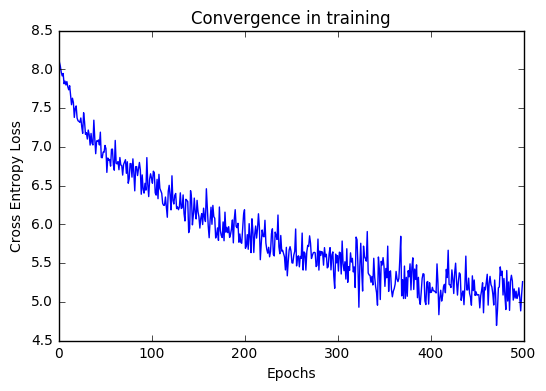

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Convergence in training')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.plot(hist.history['loss'])

In [20]:
# Y_prediction = to_categorical(Y_prediction)
# weighted_accuracy(Y_test, Y_prediction, sample_weights_test)
weighted_accuracy(Y_test, Y_prediction)

NameError: name 'Y_prediction' is not defined

In [ ]:
model.evaluate(X_test, Y_test, batch_size=20, sample_weight=sample_weights_test)

In [ ]:
Y_prediction[0]

In [21]:
loader = KPDataLoader()
loader.load_file('ex1a.mid.csv')
X, Y, m = loader.get_XX_and_YY()
X_pad = pad_sequences(X, maxlen=673, padding='post')
Y_pad = pad_sequences(Y, maxlen=673, padding='post')
sample_weights = np.ones((1, m))
for i in xrange(len(X)):
    for j in xrange(m):
        if (X_pad[i][j] == np.zeros(12)).all():
            sample_weights[i][j] = 0
Y_prediction = model.predict_classes(X_pad, batch_size=1)

1/1 [==============================] - 0s


In [42]:
np.argwhere(Y_pad)[:,2]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5,  5,
        5,  5,  0,  0,  0,  0, 11, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,
        0,  7,  7,  0,  0,  0,  0,  0,  0,  7,  7,  7,  7,  7,  7,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5,  5,  5,  5,
        0,  0,  0,  0,  0,  0,  0,  0, 11, 11, 11, 11, 11, 11, 11,  0,  0,
        0,  0,  0,  0,  0,  2,  2,  7,  7,  7,  7,  7,  7,  0,  0,  0])

In [71]:
# for i, y in enumerate(Y_pad):
#     if np.argwhere(y)[:,1] == Y_prediction[i])[:,1]:
#         print True, y, np.argwhere(X_pad[i])
#     else:
#         print False, np.argwhere(y)[:,1]#, Y_prediction[i], np.argwhere(X_pad[i])
for yp in Y_prediction:
    for i, y in enumerate(yp):
        if y == np.argwhere(Y_pad)[:,2][i]:
            print True, y, np.argwhere(X_pad[0][i])
        else:
            print False, y, np.argwhere(Y_pad)[:,2][i], np.argwhere(X_pad[0][i])

True 0 [[7]]
True 0 [[0]]
True 0 [[4]]
True 0 [[7]]
True 0 [[0]]
True 0 [[2]]
True 0 [[4]]
False 7 0 [[2]]
False 7 0 [[5]]
False 7 0 [[7]]
True 0 [[4]]
True 0 [[0]]
True 0 [[0]]
False 0 5 [[9]]
True 5 [[5]]
False 2 5 [[5]]
False 7 5 [[7]]
False 2 5 [[9]]
False 7 5 [[11]]
True 0 [[0]]
True 0 [[4]]
True 0 [[0]]
True 0 [[0]]
False 0 11 [[5]]
False 7 11 [[2]]
False 7 11 [[7]]
False 7 11 [[5]]
False 0 11 [[4]]
False 7 11 [[2]]
True 0 [[4]]
True 0 [[0]]
True 0 [[5]]
True 0 [[4]]
False 7 0 [[2]]
True 0 [[0]]
True 7 [[11]]
True 7 [[7]]
True 0 [[0]]
True 0 [[4]]
False 7 0 [[2]]
True 0 [[4]]
True 0 [[0]]
True 0 [[0]]
True 7 [[2]]
True 7 [[7]]
True 7 [[7]]
True 7 [[5]]
False 0 7 [[4]]
True 7 [[2]]
False 7 0 [[7]]
True 0 [[4]]
True 0 [[0]]
False 7 0 [[2]]
True 0 [[4]]
False 7 0 [[2]]
False 7 0 [[5]]
False 7 0 [[7]]
True 0 [[0]]
True 0 [[0]]
True 0 [[4]]
True 0 [[0]]
True 0 [[0]]
False 9 5 [[9]]
True 5 [[5]]
True 5 [[5]]
False 7 5 [[7]]
False 2 5 [[9]]
False 7 5 [[11]]
True 0 [[0]]
True 0 [[4]]
Tru

IndexError: index 101 is out of bounds for axis 0 with size 101

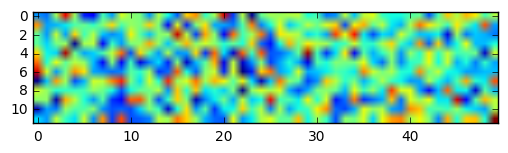

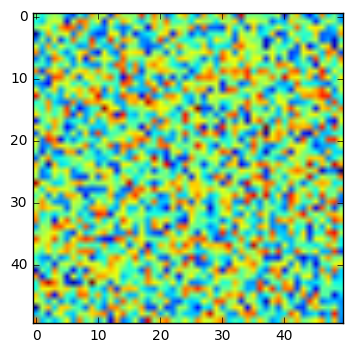

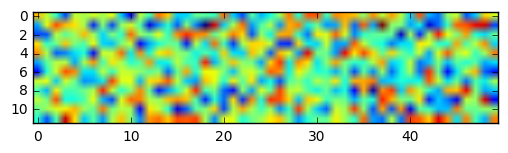

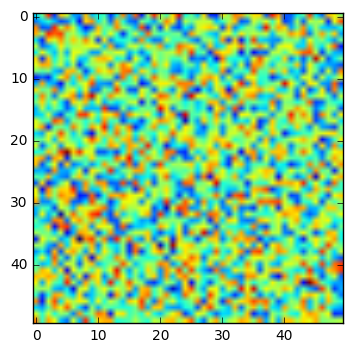

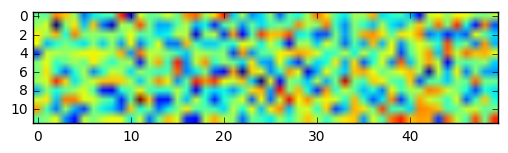

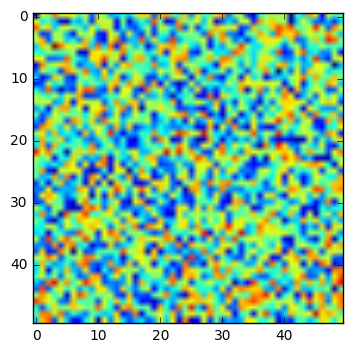

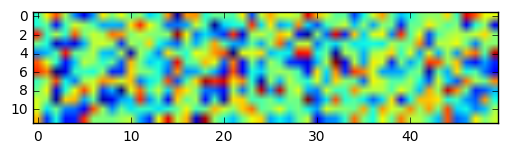

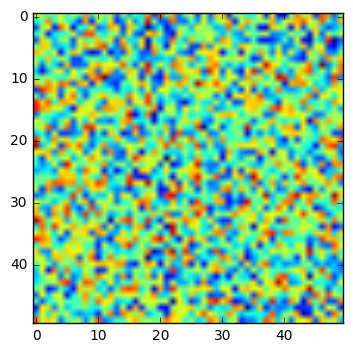

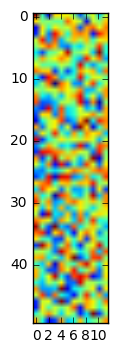

In [62]:
for w in model.get_weights():
    if len(w.shape) > 1:
        plt.figure()
        plt.imshow(w)

In [ ]:
count = 0
for y in Y_prediction:
    if sum(y) > 0:
        count += 1
        print sum(y)
print count

In [ ]:
hist.history

In [ ]:
import cPickle
with open('test.pkl', 'w') as f:
    test = 100, hist
    cPickle.dump(test, f)

In [ ]:
with open('test.pkl', 'r') as f:
    test = cPickle.load(f)